# Basic Model Pipeline

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from data_cleaner import DataCleaner
from predictor import Predictor
from utils import visualize_all  # Assuming this exists for visualization
import warnings
warnings.filterwarnings('ignore')

## Load and clean data

In [2]:
features_to_drop = [
    'Detail',
    'Detail on NON UIP',
    'Pathology Pattern Binary',
    'Pathology pattern',
    'Extras AP',
    'Treatment',
    'Extra',
    'Transplantation date',
    'Date of death',
    'Cause of death',
    'Identified Infection',
    'Pathology pattern UIP, probable or CHP',
    'Severity of telomere shortening - Transform 4',
    'FVC (L) 1 year after diagnosis', 
    'FVC (%) 1 year after diagnosis',
    'DLCO (%) 1 year after diagnosis', 
    'RadioWorsening2y',
]   

selected_features = [
       # 'Pedigree', 
       'Sex', 
       'FamilialvsSporadic',
       'Age at diagnosis', 
       'Comorbidities',
       'Radiological Pattern', 
       'Diagnosis after Biopsy',
       'Multidsciplinary committee', 
       'Pirfenidone', 
       'Nintedanib',
       'Antifibrotic Drug', 
       'Prednisone', 
       'Mycophenolate',
       'Extrapulmonary affectation',
       'Associated lung cancer', 
       'Other cancer', 
       'Type of neoplasia',
       'Blood count abnormality at diagnosis', 
       'Anemia', 
       'Thrombocytopenia',
       'Thrombocytosis', 
       'Lymphocytosis', 
       'Lymphopenia', 
       'Neutrophilia',
       'Neutropenia', 
       'Leukocytosis', 
       'Leukopenia',
       'LDH', 
       'ALT',
       'AST', 
       'ALP', 
       'GGT', 
       'Transaminitis', 
       'Cholestasis',
       'Liver disease', 
       #'FVC (L) at diagnosis',
       'FVC (%) at diagnosis', 
       'DLCO (%) at diagnosis',
       'Necessity of transplantation', 
       'Death', 
       # 'Type of family history',
       '1st degree relative', 
       '2nd degree relative', 
       'More than 1 relative',
       'Genetic mutation studied in patient', 
       'Mutation Type',
       'Severity of telomere shortening',
       'Progressive disease',
    #    'ProgressiveDisease', 
       'telomeric affectation', 
       'Hematologic Abnormalities', 
       'Liver Problem',
       'TERT',
       #'COD NUMBER',
       'Final diagnosis',
       'Event'
       ]

In [ ]:
data_path = 'data/FibroPredCODIFICADA.xlsx'  # Adjust the path as needed
df = pd.read_excel(data_path, skiprows=1)

# Clean the data
cleaner = DataCleaner(df)
df_clean = cleaner.clean(selected_features=selected_features, features_to_drop=features_to_drop)

# Split the data into training and testing sets
df_train, df_test = train_test_split(
    df_clean, 
    test_size=0.2, 
    shuffle=True, 
)

Dropped features: ['Detail', 'Detail on NON UIP', 'Pathology Pattern Binary', 'Pathology pattern', 'Extras AP', 'Treatment', 'Extra', 'Transplantation date', 'Date of death', 'Cause of death', 'Identified Infection', 'Pathology pattern UIP, probable or CHP', 'Severity of telomere shortening - Transform 4', 'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis', 'RadioWorsening2y']
Filled 10 missing 'Progressive disease' values with 0.


## Predict

### Predict Progressive Disease

Before dropping missing target 'Progressive disease': (177, 51)
After dropping missing target 'Progressive disease': (177, 51)

Training and tuning RandomForest...
Best parameters for RandomForest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'feature_selector__k': 20}
Best cross-validation F1 for RandomForest: 0.7231

Training and tuning AdaBoost...
Best parameters for AdaBoost: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 50, 'feature_selector__k': 30}
Best cross-validation F1 for AdaBoost: 0.7063

Training and tuning LogisticRegression...
Best parameters for LogisticRegression: {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'feature_selector__k': 30}
Best cross-validation F1 for LogisticRegression: 0.6166

Best classifier after tuning: RandomForest
Best F1 score: 0.7231

Top Feature Importances:
DLCO (%) at diagnosis                   0.228653
FVC (%) at diagnosis             

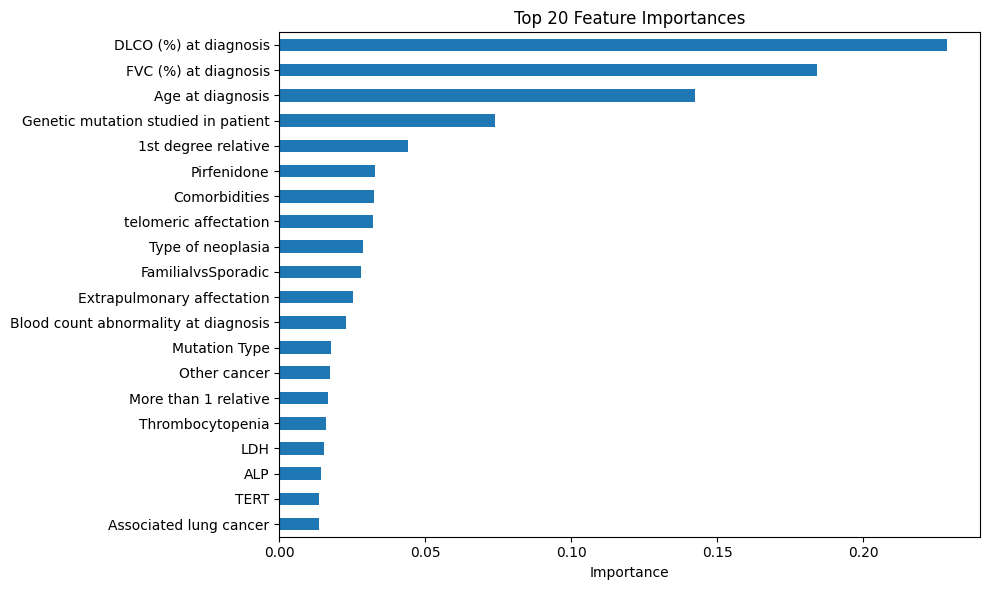

Cross-Validation: X shape: (177, 50)

Evaluation Results:
              precision    recall  f1-score   support

         0.0     0.7315    0.7745    0.7524       102
         1.0     0.6667    0.6133    0.6389        75

    accuracy                         0.7062       177
   macro avg     0.6991    0.6939    0.6956       177
weighted avg     0.7040    0.7062    0.7043       177

F1 Score: 0.6389
ROC AUC Score: 0.7825


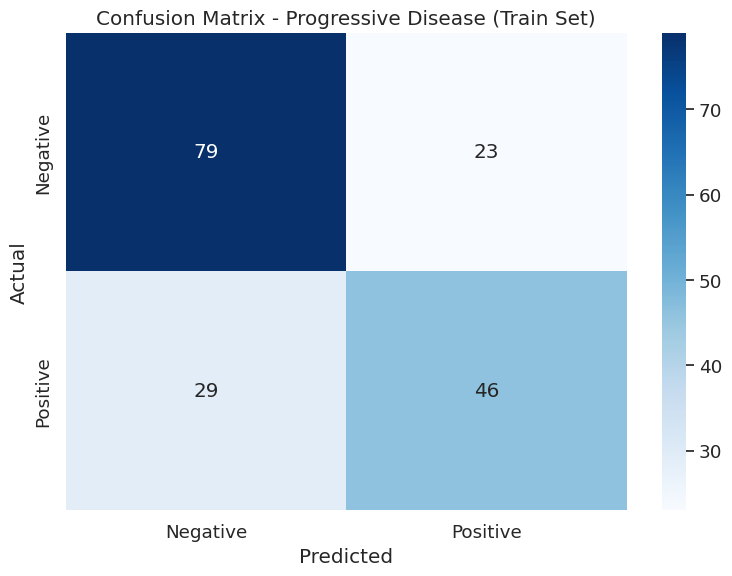

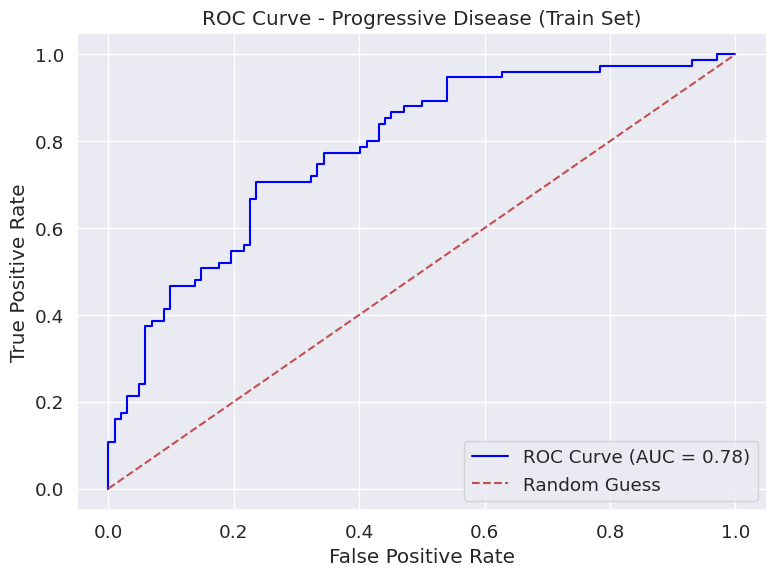


Evaluating Progressive Disease Prediction on Test Set:

Evaluation Results:
              precision    recall  f1-score   support

         0.0     0.6364    0.9130    0.7500        23
         1.0     0.8333    0.4545    0.5882        22

    accuracy                         0.6889        45
   macro avg     0.7348    0.6838    0.6691        45
weighted avg     0.7327    0.6889    0.6709        45

F1 Score: 0.5882
ROC AUC Score: 0.7826


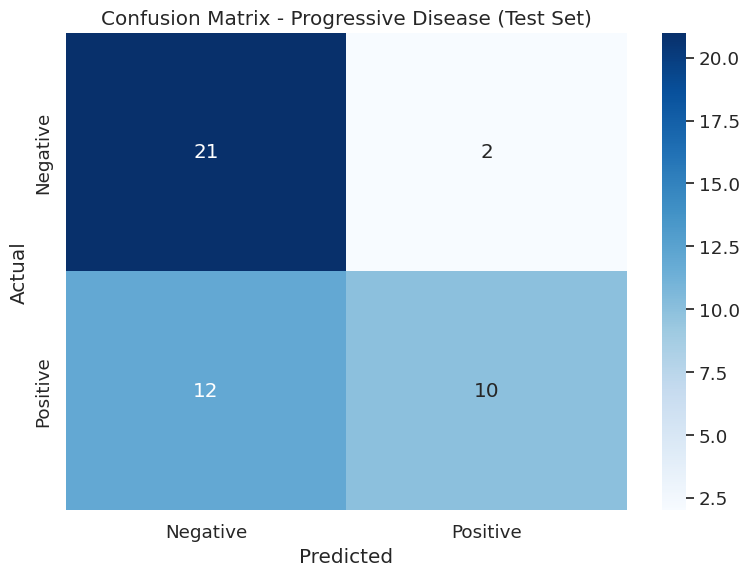

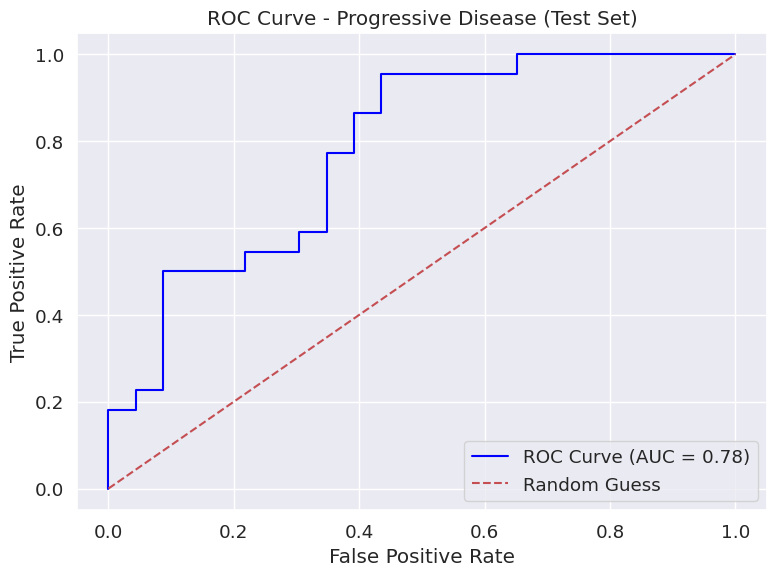

In [ ]:
# Prepare training and testing data for Progressive Disease
other_columns_to_drop = ['Death', 'Event', 'Necessity of transplantation']
df_train_PROG = df_train.drop(columns=other_columns_to_drop, errors='ignore')
df_test_PROG = df_test.drop(columns=other_columns_to_drop, errors='ignore')

# Initialize the Predictor for Progressive Disease
predictor_prog = Predictor(df_train_PROG, 'Progressive disease')
X_train_prog, y_train_prog = predictor_prog.prepare_data()

# Train the model
predictor_prog.train_model(X_train_prog, y_train_prog)

# Cross-validated predictions on training set
y_prob_train_prog = predictor_prog.cross_val_predict_proba(X_train_prog, y_train_prog)

# Evaluate the model
predictor_prog.evaluate_model(y_train_prog, y_prob_train_prog)

# Visualize results (if visualize_all function is available)
visualize_all(y_true=y_train_prog, y_prob=y_prob_train_prog)

# Predict on test set
X_test_prog = df_test_PROG.drop(columns=['Progressive disease'], errors='ignore')
y_test_prog = df_test_PROG['Progressive disease']
y_prob_test_prog = predictor_prog.predict(X_test_prog)

# Evaluate on test set
print("\nEvaluating Progressive Disease Prediction on Test Set:")
predictor_prog.evaluate_model(y_test_prog, y_prob_test_prog)

# Visualize test results (if visualize_all function is available)
visualize_all(y_true=y_test_prog, y_prob=y_prob_test_prog, set_type='Test')


### Predict Event (Death/Transplantation)

Before dropping missing target 'Event': (177, 52)
After dropping missing target 'Event': (177, 52)

Training and tuning RandomForest...


Best parameters for RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'feature_selector__k': 10}
Best cross-validation F1 for RandomForest: 0.5455

Training and tuning AdaBoost...
Best parameters for AdaBoost: {'classifier__learning_rate': 1.5, 'classifier__n_estimators': 200, 'feature_selector__k': 25}
Best cross-validation F1 for AdaBoost: 0.6711

Training and tuning LogisticRegression...
Best parameters for LogisticRegression: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'feature_selector__k': 25}
Best cross-validation F1 for LogisticRegression: 0.5080

Best classifier after tuning: AdaBoost
Best F1 score: 0.6711

Top Feature Importances:
DLCO (%) at diagnosis                     0.279389
Age at diagnosis                          0.210246
ProgressiveDisease_Prob                   0.208284
FVC (%) at diagnosis                      0.122400
Mutation Type                             0.

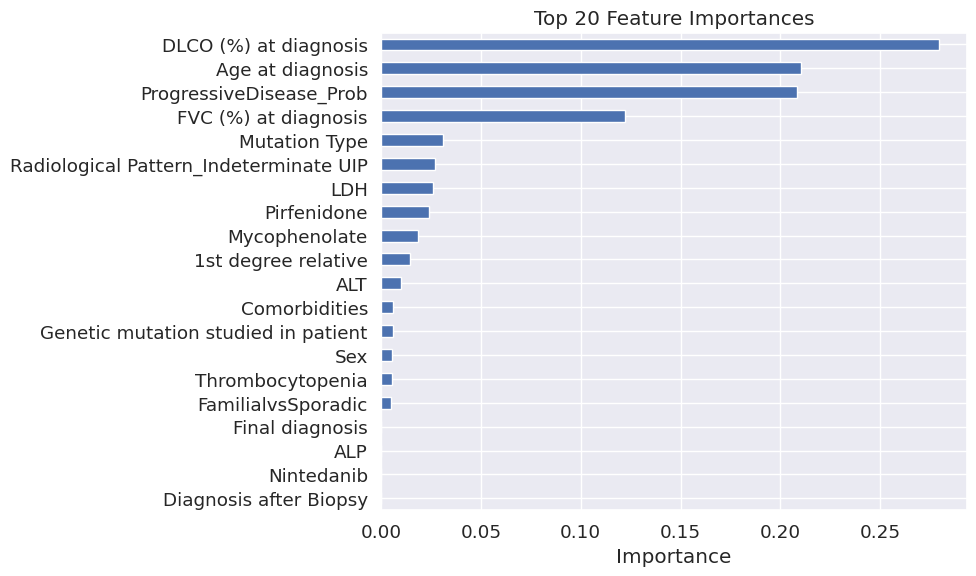

Cross-Validation: X shape: (177, 51)

Evaluation Results:
              precision    recall  f1-score   support

           0     0.9172    0.9536    0.9351       151
           1     0.6500    0.5000    0.5652        26

    accuracy                         0.8870       177
   macro avg     0.7836    0.7268    0.7501       177
weighted avg     0.8779    0.8870    0.8807       177

F1 Score: 0.5652
ROC AUC Score: 0.8232


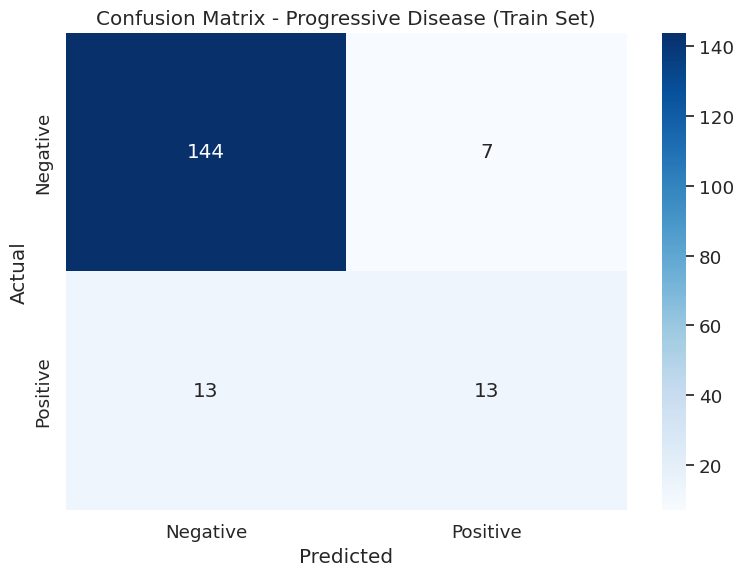

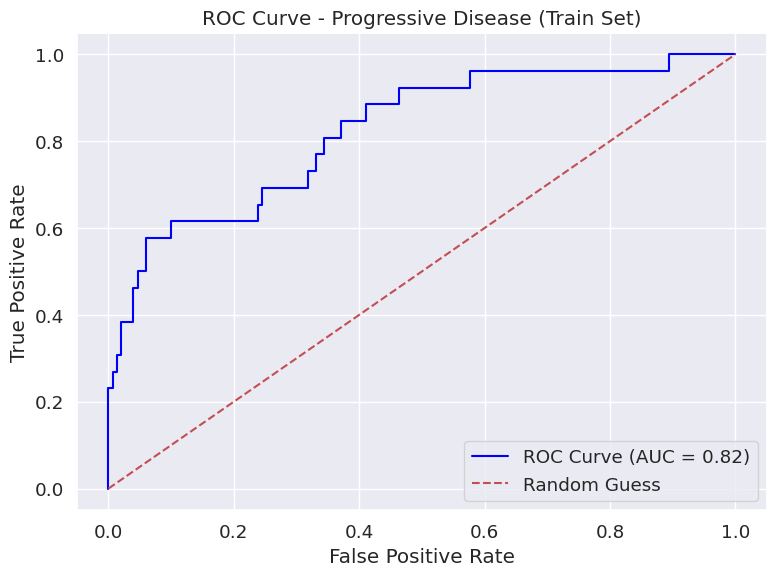


Evaluating Event Prediction on Test Set:

Evaluation Results:
              precision    recall  f1-score   support

           0     0.9231    0.9474    0.9351        38
           1     0.6667    0.5714    0.6154         7

    accuracy                         0.8889        45
   macro avg     0.7949    0.7594    0.7752        45
weighted avg     0.8832    0.8889    0.8853        45

F1 Score: 0.6154
ROC AUC Score: 0.8947


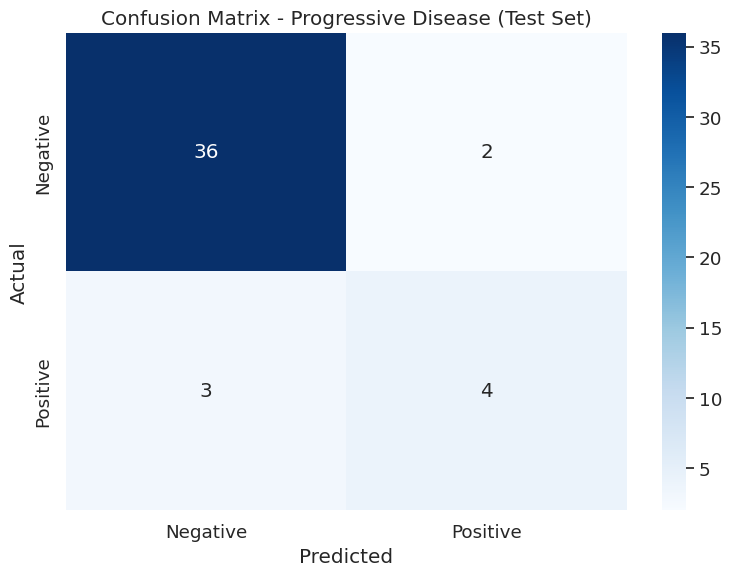

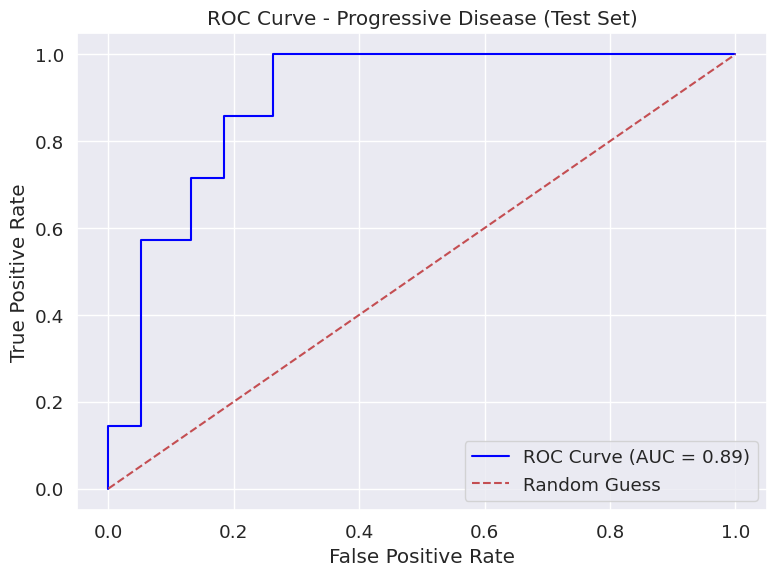

In [5]:
# Prepare training and testing data for Event prediction
other_columns_to_drop = ['Necessity of transplantation', 'Death', 'Progressive disease']
df_train_EVENT = df_train.drop(columns=other_columns_to_drop, errors='ignore')
df_test_EVENT = df_test.drop(columns=other_columns_to_drop, errors='ignore')

# Add ProgressiveDisease_Prob as a feature
df_train_EVENT['ProgressiveDisease_Prob'] = y_prob_train_prog
df_test_EVENT['ProgressiveDisease_Prob'] = y_prob_test_prog

# Initialize the Predictor for Event
predictor_event = Predictor(df_train_EVENT, 'Event')
X_train_event, y_train_event = predictor_event.prepare_data()

# Train the model
predictor_event.train_model(X_train_event, y_train_event)

# Cross-validated predictions on training set
y_prob_train_event = predictor_event.cross_val_predict_proba(X_train_event, y_train_event)

# Evaluate the model
predictor_event.evaluate_model(y_train_event, y_prob_train_event)

# Visualize results (if visualize_all function is available)
visualize_all(y_true=y_train_event, y_prob=y_prob_train_event)

# Predict on test set
X_test_event = df_test_EVENT.drop(columns=['Event'], errors='ignore')
y_test_event = df_test_EVENT['Event']
y_prob_test_event = predictor_event.predict(X_test_event)

# Evaluate on test set
print("\nEvaluating Event Prediction on Test Set:")
predictor_event.evaluate_model(y_test_event, y_prob_test_event)

# Visualize test results (if visualize_all function is available)
visualize_all(y_true=y_test_event, y_prob=y_prob_test_event, set_type='Test')


Dropped features: ['Detail', 'Detail on NON UIP', 'Pathology Pattern Binary', 'Pathology pattern', 'Extras AP', 'Treatment', 'Extra', 'Transplantation date', 'Date of death', 'Cause of death', 'Identified Infection', 'Pathology pattern UIP, probable or CHP', 'Severity of telomere shortening - Transform 4', 'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis', 'DLCO (%) 1 year after diagnosis', 'RadioWorsening2y']
Filled 0 missing 'Progressive disease' values with 0.
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters for Progressive Disease Prediction: {'cbr__n_neighbors': 3, 'cbr__p': 2, 'cbr__weights': 'distance', 'select_kbest__k': 15}
=== Progressive Disease Prediction - Training Set ===
              precision    recall  f1-score   support

           0     0.7500    0.7925    0.7706       106
           1     0.6615    0.6056    0.6324        71

    accuracy                         0.7175       177
   macro avg     0.7058    0.6990    0.7

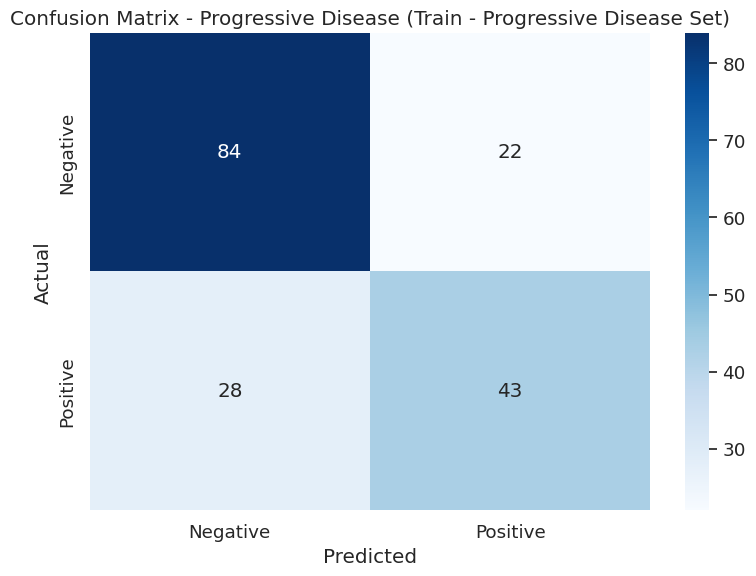

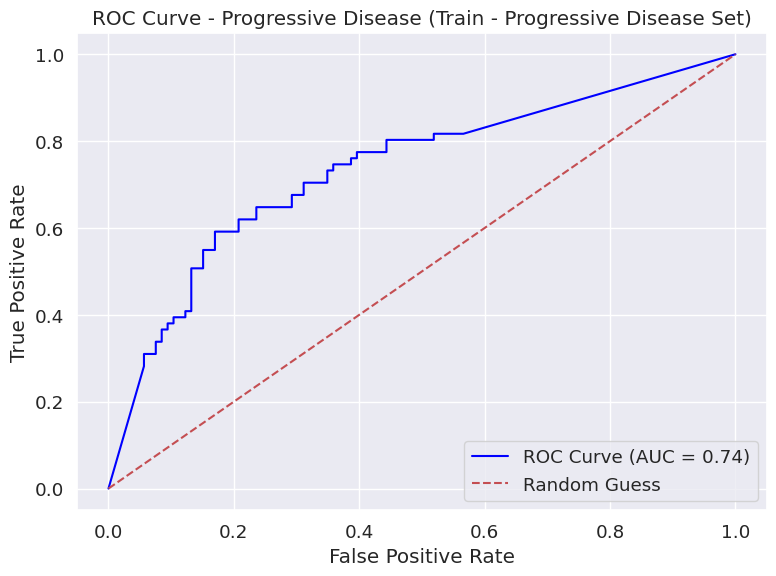


=== Progressive Disease Prediction - Test Set ===
              precision    recall  f1-score   support

           0     0.5161    0.8421    0.6400        19
           1     0.7857    0.4231    0.5500        26

    accuracy                         0.6000        45
   macro avg     0.6509    0.6326    0.5950        45
weighted avg     0.6719    0.6000    0.5880        45

F1 Score: 0.5500
ROC AUC Score: 0.6498


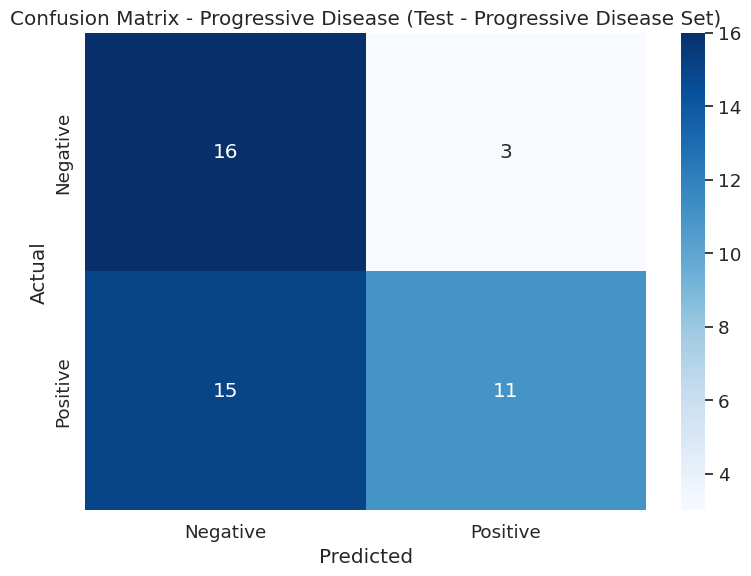

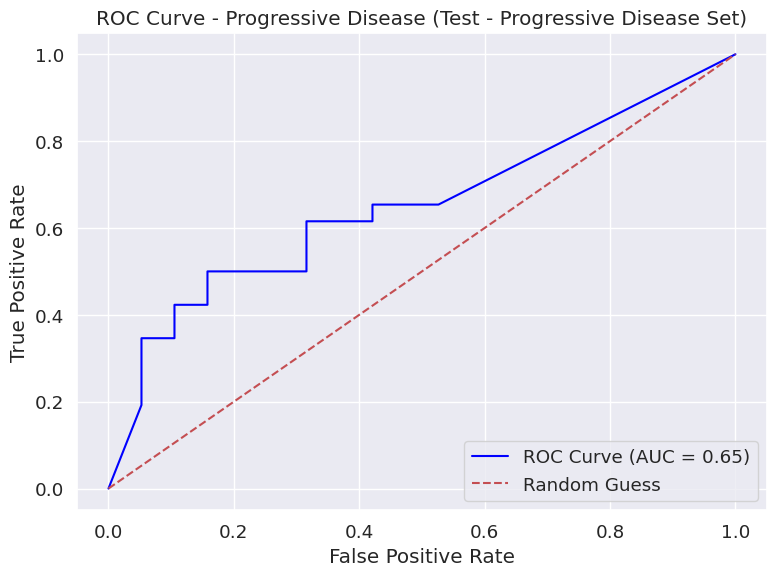

[0.5180948  0.53205469 1.         0.71915657 0.33469168 1.
 0.33637934 0.25777798 0.11768271 0.         0.29832739 0.31669976
 0.7125666  0.         0.         1.         0.         0.33047214
 0.         0.         0.7275767  0.66470484 0.32120676 0.
 0.48531795 0.33473776 0.         0.         0.         0.31674528
 0.66857881 0.69353324 0.20026909 0.54534    0.58273287 0.
 0.         0.         0.         0.52422356 1.         1.
 0.         0.17192397 0.         1.         0.         0.
 0.46966208 0.34951509 0.67170879 0.40853493 1.         0.31399341
 0.26243509 0.         1.         1.         0.34982977 0.62811379
 0.67079682 0.23781119 1.         1.         0.81525597 0.70552793
 0.81478497 0.         0.         0.68713703 0.3319075  1.
 0.3299724  0.7635753  0.         1.         1.         0.34178015
 0.         0.         0.         0.         1.         0.58576024
 0.         0.31843469 0.46951446 0.50690608 0.43145682 0.33888883
 0.67299591 0.         1.         0.4351255

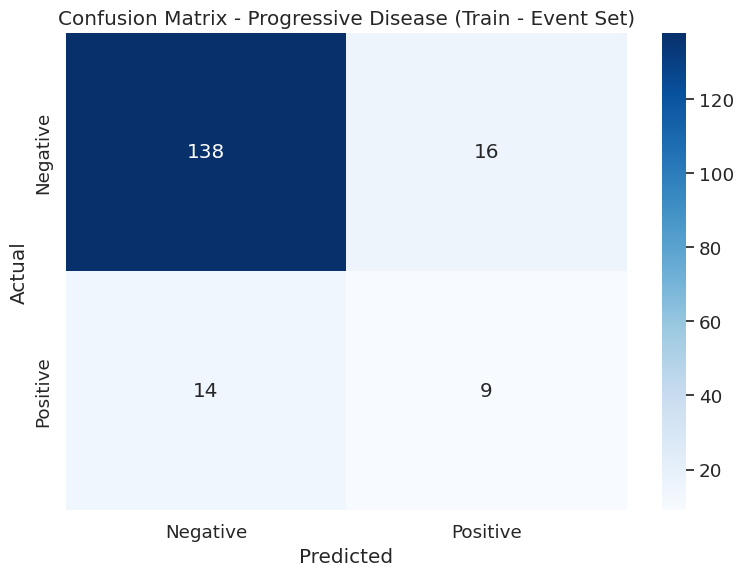

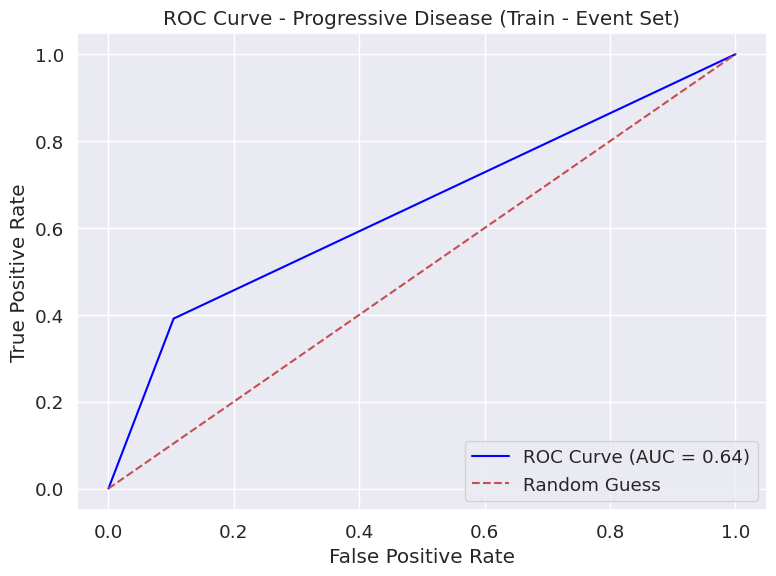


=== Event Prediction (Death/Transplantation) - Test Set ===
              precision    recall  f1-score   support

           0     0.7907    0.9714    0.8718        35
           1     0.5000    0.1000    0.1667        10

    accuracy                         0.7778        45
   macro avg     0.6453    0.5357    0.5192        45
weighted avg     0.7261    0.7778    0.7151        45

F1 Score: 0.1667
ROC AUC Score: 0.5357


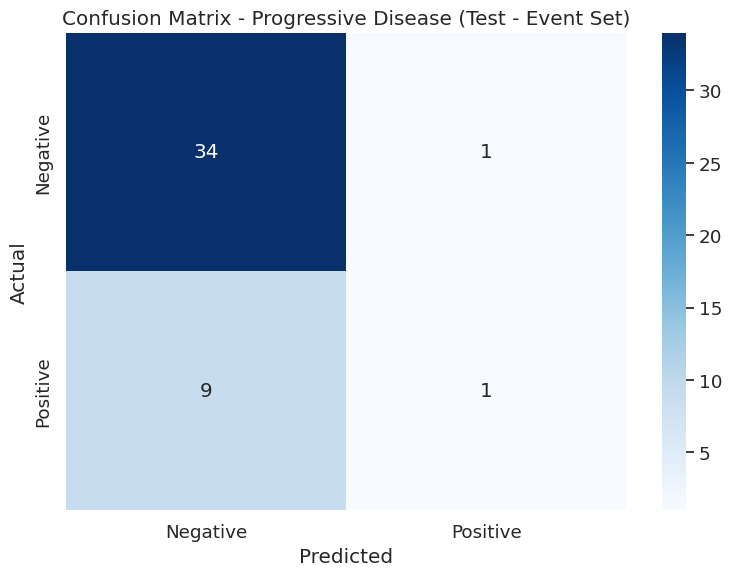

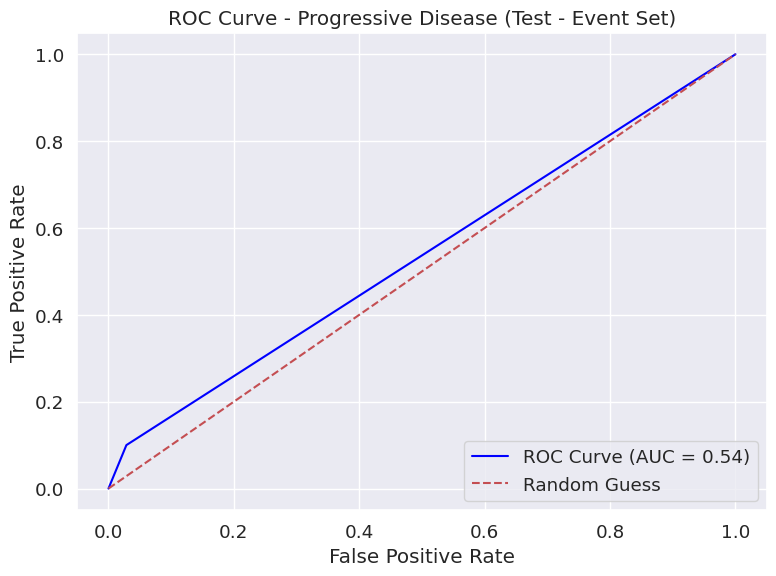


Explanations for Event Prediction:

Test Case 1:
Input Case:
{0: 77.0, 1: 1.0, 2: 0.0, 3: 1.0, 4: 0.24272733164537294}

Similar Cases:
Similar Case 1:
Features: {0: 84.0, 1: 1.0, 2: 0.0, 3: 1.0, 4: 0.33239081801530446}
Outcome: 0
Distance: 76.12966348636994

Test Case 2:
Input Case:
{0: 80.0, 1: 1.0, 2: 0.0, 3: 1.0, 4: 0.0}

Similar Cases:
Similar Case 1:
Features: {0: 80.0, 1: 1.0, 2: 0.0, 3: 1.0, 4: 0.0}
Outcome: 0
Distance: 79.12

Test Case 3:
Input Case:
{0: 36.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0}

Similar Cases:
Similar Case 1:
Features: {0: 67.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0}
Outcome: 0
Distance: 35.38


In [2]:
# main_cbr.py

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from data_cleaner import DataCleaner
from cbr_model import CBRModel
from utils import visualize_all
import warnings
warnings.filterwarnings('ignore')

# Load data
data_path = 'data/FibroPredCODIFICADA.xlsx'  # Adjust the path as needed
df = pd.read_excel(data_path, skiprows=1)

# List of features to drop (as per your code)
features_to_drop = [
    'Detail',
    'Detail on NON UIP',
    'Pathology Pattern Binary',
    'Pathology pattern',
    'Extras AP',
    'Treatment',
    'Extra',
    'Transplantation date',
    'Date of death',
    'Cause of death',
    'Identified Infection',
    'Pathology pattern UIP, probable or CHP',
    'Severity of telomere shortening - Transform 4',
    'FVC (L) 1 year after diagnosis', 
    'FVC (%) 1 year after diagnosis',
    'DLCO (%) 1 year after diagnosis', 
    'RadioWorsening2y',
]   

selected_features = [
    # 'Pedigree', 
    'Sex', 
    'FamilialvsSporadic',
    'Age at diagnosis', 
    'Comorbidities',
    'Radiological Pattern', 
    'Diagnosis after Biopsy',
    'Multidsciplinary committee', 
    'Pirfenidone', 
    'Nintedanib',
    'Antifibrotic Drug', 
    'Prednisone', 
    'Mycophenolate',
    'Extrapulmonary affectation',
    'Associated lung cancer', 
    'Other cancer', 
    'Type of neoplasia',
    'Blood count abnormality at diagnosis', 
    'Anemia', 
    'Thrombocytopenia',
    'Thrombocytosis', 
    'Lymphocytosis', 
    'Lymphopenia', 
    'Neutrophilia',
    'Neutropenia', 
    'Leukocytosis', 
    'Leukopenia',
    'LDH', 
    'ALT',
    'AST', 
    'ALP', 
    'GGT', 
    'Transaminitis', 
    'Cholestasis',
    'Liver disease', 
    #'FVC (L) at diagnosis',
    'FVC (%) at diagnosis', 
    'DLCO (%) at diagnosis',
    'Necessity of transplantation', 
    'Death', 
    # 'Type of family history',
    '1st degree relative', 
    '2nd degree relative', 
    'More than 1 relative',
    'Genetic mutation studied in patient', 
    'Mutation Type',
    'Severity of telomere shortening',
    'Progressive disease',
#    'ProgressiveDisease', 
    'telomeric affectation', 
    'Hematologic Abnormalities', 
    'Liver Problem',
    'TERT',
    #'COD NUMBER',
    'Final diagnosis',
    'Event'
    ]

# Clean the data
cleaner = DataCleaner(df)
df_clean = cleaner.clean(selected_features=selected_features, features_to_drop=features_to_drop)

# Ensure there are no missing values
if df_clean.isnull().sum().sum() > 0:
    print("Data contains missing values. Imputing missing values...")
    df_clean.fillna(df_clean.median(), inplace=True)

# Split the data
df_train, df_test = train_test_split(
    df_clean,
    test_size=0.2,
    shuffle=True,
    random_state=42
)

# *********************************
# Step 1: Predict Progressive Disease
# *********************************

# Prepare data for Progressive Disease prediction
other_columns_to_drop = ['Death', 'Event', 'Necessity of transplantation']
df_train_prog = df_train.drop(columns=other_columns_to_drop, errors='ignore')
df_test_prog = df_test.drop(columns=other_columns_to_drop, errors='ignore')

target_prog = 'Progressive disease'

# Separate features and target
X_train_prog = df_train_prog.drop(columns=[target_prog])
y_train_prog = df_train_prog[target_prog].astype(int)

X_test_prog = df_test_prog.drop(columns=[target_prog])
y_test_prog = df_test_prog[target_prog].astype(int)

# ----------- TRAINING -----------
# Build the pipeline
pipeline_prog = Pipeline([
    ('variance_threshold', VarianceThreshold()),
    ('select_kbest', SelectKBest(score_func=f_classif)),
    ('scaler', MinMaxScaler()),  # Scaling can be important for k-NN
    ('cbr', CBRModel())
])

# Define the parameter grid
param_grid_prog = {
    'select_kbest__k': [5, 10, 15, 20, 25, 30, 35, 40, 45, 'all'],
    'cbr__n_neighbors': [1, 3, 5],
    'cbr__weights': ['uniform', 'distance'],
    'cbr__p': [1, 2],
}

# Set up GridSearchCV
grid_search_prog = GridSearchCV(
    pipeline_prog,
    param_grid=param_grid_prog,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1  # Optional: Increase verbosity to see progress
)

# Fit the model
grid_search_prog.fit(X_train_prog, y_train_prog)

# Get the best estimator
best_pipeline_prog = grid_search_prog.best_estimator_
print(f"Best parameters for Progressive Disease Prediction: {grid_search_prog.best_params_}")

# Cross-validated predictions on training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_train_prog = cross_val_predict(
    best_pipeline_prog, X_train_prog, y_train_prog, cv=cv, method='predict', n_jobs=-1
)
y_pred_proba_train_prog = cross_val_predict(
    best_pipeline_prog, X_train_prog, y_train_prog, cv=cv, method='predict_proba', n_jobs=-1
)[:, 1]

# Evaluate on training data
print("=== Progressive Disease Prediction - Training Set ===")
print(classification_report(y_train_prog, y_pred_train_prog, digits=4))
print(f"F1 Score: {f1_score(y_train_prog, y_pred_train_prog):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_train_prog, y_pred_proba_train_prog):.4f}")

# Visualize results on training data
visualize_all(y_train_prog, y_pred_proba_train_prog, set_type='Train - Progressive Disease')

# ----------- PREDICTION -----------
# Predict on test set
y_pred_test_prog = best_pipeline_prog.predict(X_test_prog)
y_pred_proba_test_prog = best_pipeline_prog.predict_proba(X_test_prog)[:, 1]

# Evaluate on test data
print("\n=== Progressive Disease Prediction - Test Set ===")
print(classification_report(y_test_prog, y_pred_test_prog, digits=4))
print(f"F1 Score: {f1_score(y_test_prog, y_pred_test_prog):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_prog, y_pred_proba_test_prog):.4f}")

# Visualize results on test data
visualize_all(y_test_prog, y_pred_proba_test_prog, set_type='Test - Progressive Disease')

# *********************************
# Step 2: Predict Event (Death/Transplantation)
# *********************************

# Prepare data for Event prediction
other_columns_to_drop = ['Progressive disease', 'Death', 'Necessity of transplantation']
df_train_event = df_train.drop(columns=other_columns_to_drop, errors='ignore')
df_test_event = df_test.drop(columns=other_columns_to_drop, errors='ignore')

# Add the predicted probabilities from Progressive Disease as a new feature
df_train_event['ProgressiveDisease_Prob'] = y_pred_proba_train_prog
df_test_event['ProgressiveDisease_Prob'] = y_pred_proba_test_prog

target_event = 'Event'

# Separate features and target
X_train_event = df_train_event.drop(columns=[target_event])
y_train_event = df_train_event[target_event].astype(int)

X_test_event = df_test_event.drop(columns=[target_event])
y_test_event = df_test_event[target_event].astype(int)

# ----------- TRAINING -----------
# Build the pipeline
pipeline_event = Pipeline([
    ('variance_threshold', VarianceThreshold()),
    ('select_kbest', SelectKBest(score_func=f_classif)),
    ('scaler', MinMaxScaler()),
    ('cbr', CBRModel())
])

# Define the parameter grid
param_grid_event = {
    'select_kbest__k': [5, 10, 15, 20, 25, 30, 35, 40, 'all'],
    'cbr__n_neighbors': [1, 2, 3, 4],
    'cbr__weights': ['uniform', 'distance'],
    'cbr__p': [1, 2],
    'cbr__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'cbr__leaf_size': [10, 20, 30],
    'cbr__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'cbr__metric_params': [None],
    'cbr__n_jobs': [-1]
}

# Set up GridSearchCV
grid_search_event = GridSearchCV(
    pipeline_event,
    param_grid=param_grid_event,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_event.fit(X_train_event, y_train_event)

# Get the best estimator
best_pipeline_event = grid_search_event.best_estimator_
print(f"Best parameters for Event Prediction: {grid_search_event.best_params_}")

# Get cross-validated predictions on training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_train_event = cross_val_predict(
    best_pipeline_event, X_train_event, y_train_event, cv=cv, method='predict', n_jobs=-1
)
y_pred_proba_train_event = cross_val_predict(
    best_pipeline_event, X_train_event, y_train_event, cv=cv, method='predict_proba', n_jobs=-1
)[:, 1]

# Evaluate on training data
print("\n=== Event Prediction (Death/Transplantation) - Training Set ===")
print(classification_report(y_train_event, y_pred_train_event, digits=4))
print(f"F1 Score: {f1_score(y_train_event, y_pred_train_event):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_train_event, y_pred_proba_train_event):.4f}")

# Visualize results on training data
visualize_all(y_train_event, y_pred_proba_train_event, set_type='Train - Event')

# ----------- PREDICTION -----------
# Predict on test set
y_pred_test_event = best_pipeline_event.predict(X_test_event)
y_pred_proba_test_event = best_pipeline_event.predict_proba(X_test_event)[:, 1]

# Evaluate on test data
print("\n=== Event Prediction (Death/Transplantation) - Test Set ===")
print(classification_report(y_test_event, y_pred_test_event, digits=4))
print(f"F1 Score: {f1_score(y_test_event, y_pred_test_event):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_event, y_pred_proba_test_event):.4f}")

# Visualize results on test data
visualize_all(y_test_event, y_pred_proba_test_event, set_type='Test - Event')

# *********************************
# Explanations for Event Prediction
# *********************************

# Provide explanations for predictions
cbr_event_best = best_pipeline_event.named_steps['cbr']

# Since the pipeline includes variance thresholding and feature selection, we need to transform the data
variance_threshold = best_pipeline_event.named_steps['variance_threshold']
select_kbest = best_pipeline_event.named_steps['select_kbest']

# Transform the test and training data
X_test_event_transformed = select_kbest.transform(variance_threshold.transform(X_test_event))
X_train_event_transformed = select_kbest.transform(variance_threshold.transform(X_train_event))

# Provide explanations
print("\nExplanations for Event Prediction:")
explanations = cbr_event_best.explain(
    pd.DataFrame(X_test_event_transformed),
    pd.DataFrame(X_train_event_transformed),
    y_train_event.reset_index(drop=True)  # Ensure the index aligns
)

for idx, explanation in enumerate(explanations[:3]):  # Show explanations for first 3 test cases
    print(f"\nTest Case {idx+1}:")
    print("Input Case:")
    print(explanation['input_case'])
    print("\nSimilar Cases:")
    for sc_idx, (case, outcome, distance) in enumerate(zip(explanation['similar_cases'], explanation['similar_outcomes'], explanation['distances'])):
        print(f"Similar Case {sc_idx+1}:")
        print(f"Features: {case}")
        print(f"Outcome: {outcome}")
        print(f"Distance: {distance}")


In [2]:
from cbr_model import CBRModel

# Initialize the CBRModel with desired parameters
cbr_model = CBRModel(
    k_features=20,  # Number of features to select
    param_grid={
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model
cbr_model.fit(X_train, y_train)

# Predictions
y_pred = cbr_model.predict(X_test)
y_pred_proba = cbr_model.predict_proba(X_test)[:, 1]

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred, digits=4))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Explain predictions
explanations = cbr_model.explain(X_test, X_train, y_train)


TypeError: CBRModel.__init__() got an unexpected keyword argument 'k_features'